# <font color=green size="6"><center> Allstate Claims Severity<br>How severe is an insurance claim?</center></font>

## 1. Description/Overview
Allstate Corporation is one of the largest insurance companies in the United State. The main products that Allstate offers are car insurance, recreational vehicles insurance, home, property, condo, renters insurance, and so on. In order to provide better claims service for Allstate’s customers, the company is developing automated methods to predict claims serverity.<br> 

This problem has been picked from [kaggle](https://www.kaggle.com/c/allstate-claims-severity) and this is the [data source](https://www.kaggle.com/c/allstate-claims-severity/data).

## 2. Real world Business Objective
Aim of this challenge is to build a Machine Learning model that can help Allstate to automate the process of predicting the severity of the claims accurately and hence *ensuring a worry-free customer experience* and *saving both time and money invested to do this task manually.*

**Real-time Constraint**:
* No strict latency requirements.
* Interpretability is important. 

## 3. Mapping the real-world problem to a Machine Learning Problem 
This is a regression problem. To solve this challenge, we have to predict loss/cost of claim for each of the data point given to us. 

### 3.1. Performance Metrics
Models are evaluated on the [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) between the predicted loss($\hat{y_i}$) and the actual loss($y_i$).
<br>
<br>
\begin{equation*}
MAE = \frac{\sum_{i=1}^{n}|\hat{y_i} - y_i|}{n}
\end{equation*}

where $n$ is total number of data points.

### 3.2. Data Overview
We have train dataset and test dataset. Each dataset consists of columns (both categorical and continuous) containing accident information. <br>
<br>
 **Shape of train data: 188318 rows and 132 columns**<br>
 **Shape of test data: 125546 rows and 131 columns**<br>
 <br>
So there are total 136 features/columns and having following details:
* *id*: Unique id assingned to each row
* *cat1, cat2,..., cat116*: These are 116 anonymized categorical features.
* *cont1, cont2,...,cont14*: These are 14 anonymized continuous features.
* *loss*: Target variable that needs to be predicted. Amount of cost for each claim.

### 3.3. Some useful resources:
https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms<br>
https://www.kaggle.com/achalshah/allstate-feature-analysis-python

## 4. Exploratory Data Analysis

In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Train data shape: ", train_df.shape)
print("Test data shape: ", test_df.shape)

Train data shape:  (188318, 132)
Test data shape:  (125546, 131)


In [3]:
train_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
#Checking missing value
print('Count of missing value in train data: ',train_df.isnull().sum().sum())
print('Count of missing value in test data: ',test_df.isnull().sum().sum())

Count of missing value in train data:  0
Count of missing value in test data:  0


There is no missing value neither in train nor in test data. So no need of any missing value imputation.

In [5]:
#Storing categorical and continuous features in different list
cat_features= [col for col in train_df.columns if 'cat' in col ]
cont_features= [col for col in train_df.columns if 'cont' in col]
print('Total categorical features:', len(cat_features))
print(cat_features)
print('Total continuous features:', len(cont_features))
print(cont_features)

Total categorical features: 116
['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat1

## Exploring categorical variable:

In [6]:
#printing all unique categories in each categorical feature
for col in cat_features:
    print('Unique Categories in {} columns'.format(col))
    print(train_df[col].unique())
    print('Number of unique categories:',len(train_df[col].unique()))
    print('*'*30)

Unique Categories in cat1 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat2 columns
['B' 'A']
Number of unique categories: 2
******************************
Unique Categories in cat3 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat4 columns
['B' 'A']
Number of unique categories: 2
******************************
Unique Categories in cat5 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat6 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat7 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat8 columns
['A' 'B']
Number of unique categories: 2
******************************
Unique Categories in cat9 columns
['B' 'A']
Number of unique categories: 2
******************************
Unique Categories in cat10 columns
['A' 'B']
N

Number of unique categories: 4
******************************
Unique Categories in cat82 columns
['B' 'A' 'D' 'C']
Number of unique categories: 4
******************************
Unique Categories in cat83 columns
['D' 'B' 'A' 'C']
Number of unique categories: 4
******************************
Unique Categories in cat84 columns
['C' 'A' 'D' 'B']
Number of unique categories: 4
******************************
Unique Categories in cat85 columns
['B' 'A' 'C' 'D']
Number of unique categories: 4
******************************
Unique Categories in cat86 columns
['D' 'B' 'C' 'A']
Number of unique categories: 4
******************************
Unique Categories in cat87 columns
['B' 'C' 'D' 'A']
Number of unique categories: 4
******************************
Unique Categories in cat88 columns
['A' 'D' 'E' 'B']
Number of unique categories: 4
******************************
Unique Categories in cat89 columns
['A' 'B' 'C' 'E' 'D' 'H' 'I' 'G']
Number of unique categories: 8
******************************
Un

Minimum Number of unique categories in each column can found as 2<br>
Maximum Number of unique categories in each column can found as larges as 326<br>
<br> We saw that some of the columns have category name as single capital letters, whereas some columns have each of there category as combination of two capital letters. 
<br>This gives us a lot of idea about the way we can vectorize these categories. We will come into this later.


In [ ]:
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 5))
    for j in range(n_cols):
        sn.countplot(x=cat_features[i*n_cols+j], data=train_df, ax=ax[j])

From above frequency plot for all 116 categorical variable, we can notice that same pairs of variable have very similar countplots suggesting some kind of association. To know more we can find out correlation among these categorical features.

In [8]:
#Finding correlation among categorical features: https://stackoverflow.com/a/46498792
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# THis is done by cramer's V method
def cramers_v(x, y):
    '''Here x and y are categorical variable 
    among which we have to find association'''
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

If we find out association among all categorical variables, then it would be like having a matrix of shape 116X116. Where each element shows the correlation among two categorical feature. So rather than printing that huge matrix, we will only print those pairs of categorical variable which have association higher than 0.8

In [11]:
for i in range(1,117):
    for j in range(i+1,117):
        c_v = cramers_v(train_df['cat'+str(i)],train_df['cat'+str(j)])
        if c_v>0.8:
            print('Correlation between {} and {}: {}'.format('cat'+str(i),'cat'+str(j),c_v))

Correlation between cat2 and cat9: 0.9324089001960028
Correlation between cat2 and cat101: 0.9999548620837292
Correlation between cat3 and cat90: 0.999986724353774
Correlation between cat4 and cat111: 0.9999628277464193
Correlation between cat5 and cat103: 0.9999707933456559
Correlation between cat6 and cat50: 0.9257171398727433
Correlation between cat6 and cat114: 0.999954862083729
Correlation between cat7 and cat57: 0.8092793391010762
Correlation between cat7 and cat89: 0.9999840692033797
Correlation between cat8 and cat66: 0.8621752828077204
Correlation between cat8 and cat102: 0.999981414045935
Correlation between cat9 and cat101: 0.9348169521669347
Correlation between cat12 and cat101: 0.8052276284078748
Correlation between cat50 and cat114: 0.9273714729440763
Correlation between cat57 and cat89: 0.809600036866663
Correlation between cat66 and cat102: 0.8638851274567992
Correlation between cat71 and cat116: 0.9991393734958409
Correlation between cat73 and cat100: 0.861739038370705

We can see that there are multiple pairs of categorical variable which shows strong association among them, droping them is one way that we will see later.

## Exploring Continuous Variable:

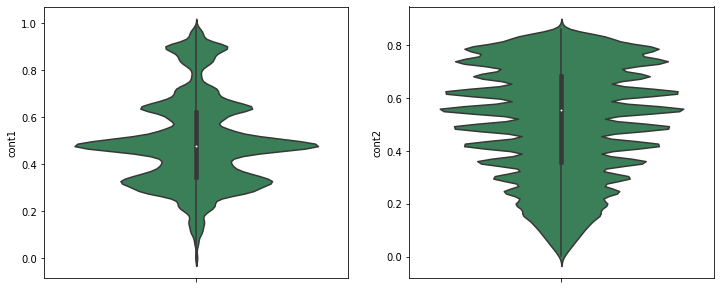

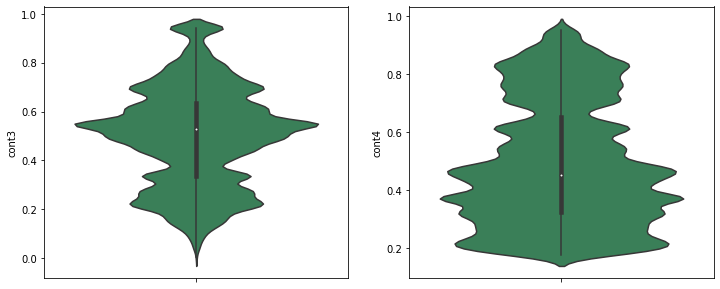

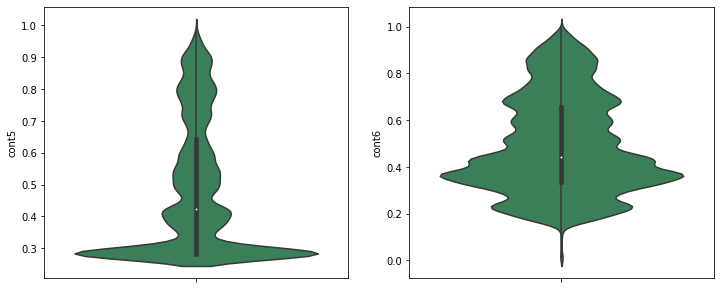

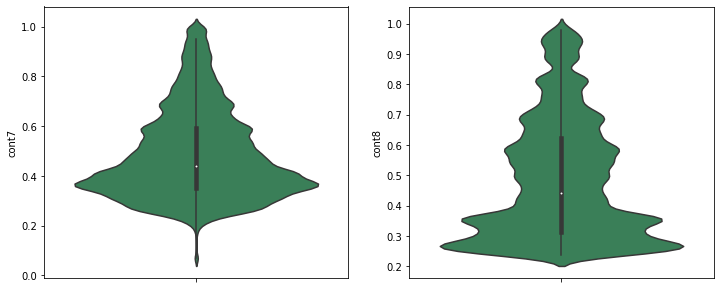

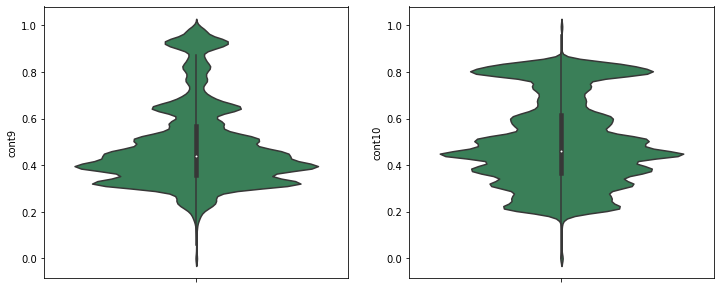

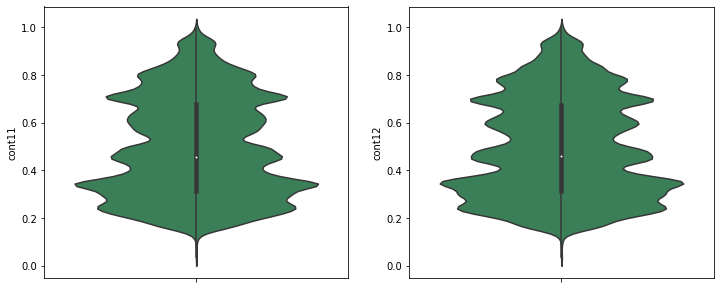

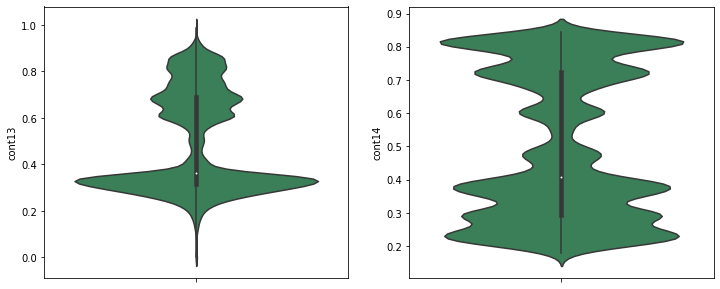

In [12]:
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 5))
    for j in range(n_cols):
        sn.violinplot(y=cont_features[i*n_cols+j], data=train_df, ax=ax[j], color='seagreen')


From above plot for all 14 continuous features, we can notice that same pairs of variable have very similar distribution suggesting some kind of association. To know more we can find out correlation among these features.



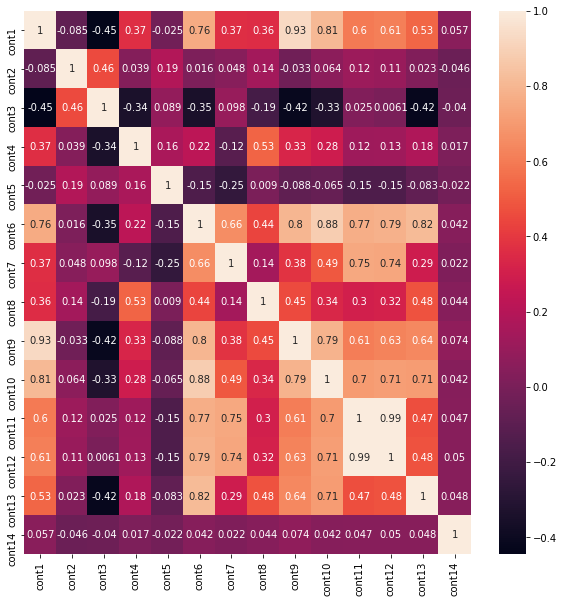

In [18]:
#Plotting heatmap
plt.figure(figsize=(10,10))
corr_matrix = train_df.drop(['id','loss'],axis=1).corr()
sn.heatmap(corr_matrix, annot=True);

From above heat map, we can see that there are many pairs of features which have higher correlation among them. For example, (cont11, cont12) have correlation of 0.99 and (cont9, cont1) have correlation of 0.93<br>
We can later figure out in data prepration part how to deal with highly correlated variable.

In [24]:
#Printing pairs of highly correlated features
for i in range(0,14):
    for j in range(0,i):
        if corr_matrix.iloc[i,j]>0.85:
            print('Correlation between cont{} and cont{}: {}'.format(i+1,j+1,corr_matrix.iloc[i,j]))

Correlation between cont9 and cont1: 0.9299117057616605
Correlation between cont10 and cont6: 0.8833505068490387
Correlation between cont12 and cont11: 0.9943841100215426


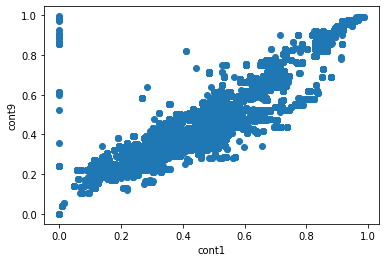

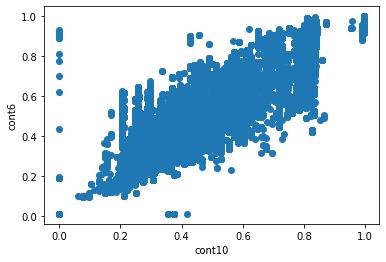

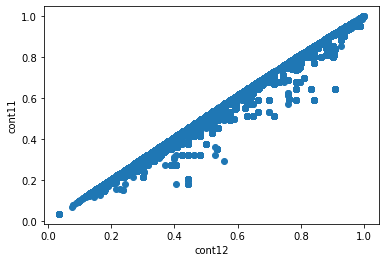

In [29]:
#Why not let's plot correlated features and observe there association;
plt.scatter(train_df['cont1'],train_df['cont9'])
plt.xlabel('cont1')
plt.ylabel('cont9')
plt.show()

plt.scatter(train_df['cont10'],train_df['cont6'])
plt.xlabel('cont10')
plt.ylabel('cont6')
plt.show()

plt.scatter(train_df['cont12'],train_df['cont11'])
plt.xlabel('cont12')
plt.ylabel('cont11');

Above scatter plots also confirms the higher amount of association among those features.
<br>
After doing EDA, let's move to **data prepration** part where we will be preparing our data to feed them into models.

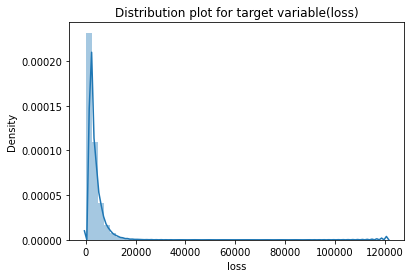

In [3]:
sn.distplot(train_df['loss'])
plt.ylabel('Density')
plt.title('Distribution plot for target variable(loss)');

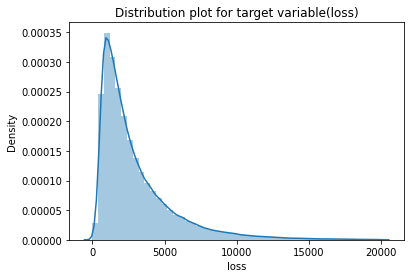

In [4]:
sn.distplot(train_df['loss'][train_df.loss<20000])
plt.ylabel('Density')
plt.title('Distribution plot for target variable(loss)');

Above two distribution plots for loss show a highly skewed distribution, where most of the values lies in the range 0 to 5000.
If the distribution of loss is somewhat uniform i.e density is almost equally spread over a range then our machine learning models will have a an extra privilage of giving prediction with less bias. 
<br>
One way to deal with this skewness is to apply log transformation.


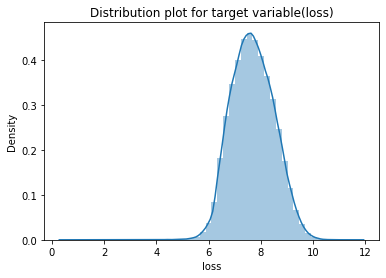

In [5]:
sn.distplot(np.log1p(train_df['loss']))
plt.ylabel('Density')
plt.title('Distribution plot for target variable(loss)');